# 🧩 Level 2.2: The Backpropagation Mystery

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YOUR_USERNAME/ai-mastery-from-scratch/blob/main/notebooks/phase_2_neural_network_revolution/2.2_backpropagation_mystery.ipynb)

---

## 🎯 The Challenge: How Does Error Flow Backwards?

In this lesson, you'll unravel the secret behind how neural networks learn: backpropagation! We'll visualize how errors flow backward through the network and update the weights step by step.

### What You'll Discover:
- The chain rule in action
- How gradients flow through a network
- Step-by-step weight updates
- Visual intuition for learning

Let's begin the mystery!

## 🚀 Setup & Imports

*Run the cell below to set up your environment. This works in both Google Colab and local Jupyter notebooks.*

In [1]:
# 📦 Install Required Packages
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install ipywidgets --quiet

print("✅ All packages installed!")

✅ All packages installed!


In [2]:
# 🔧 Environment Check & Imports
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

plt.style.use('default')
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 12

print("🎯 Environment ready!")

🎯 Environment ready!


## 🧬 Generate XOR Dataset

We'll use the same XOR dataset as before to see how backpropagation helps the network learn.

In [3]:
# Generate XOR data (2D)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

# Add a little noise for visualization
np.random.seed(42)
X_noisy = X + 0.08 * np.random.randn(*X.shape)


## 👀 Visualize XOR Data

Let's plot the XOR dataset again to remind ourselves of the challenge.

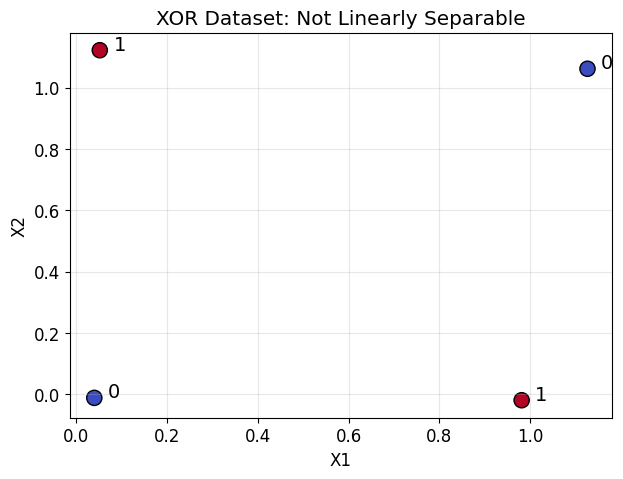

In [4]:
# Plot XOR data
plt.scatter(X_noisy[:,0], X_noisy[:,1], c=y, cmap='coolwarm', s=120, edgecolors='k')
for i, (x, label) in enumerate(zip(X_noisy, y)):
    plt.text(x[0]+0.03, x[1], str(label), fontsize=14, color='black')
plt.title('XOR Dataset: Not Linearly Separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True, alpha=0.3)
plt.show()

## 🏗️ Build a Two-Layer Neural Network (Forward Pass)

Let's start by building a two-layer neural network for XOR. We'll do a forward pass to compute predictions before learning how to train it.

In [5]:
# Define a two-layer neural network (forward pass only)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def two_layer_forward(X, w1, w2, b1, w3, w4, b2, w_out, b_out):
    # Hidden layer
    h1 = sigmoid(w1 * X[:,0] + w2 * X[:,1] + b1)
    h2 = sigmoid(w3 * X[:,0] + w4 * X[:,1] + b2)
    # Output layer
    z_out = w_out[0] * h1 + w_out[1] * h2 + b_out
    return sigmoid(z_out), h1, h2

# Initialize weights (randomly for now)
w1, w2, b1 = 5.0, 5.0, -2.5
w3, w4, b2 = -5.0, -5.0, 7.5
w_out = np.array([5.0, 5.0])
b_out = -7.5

probs, h1, h2 = two_layer_forward(X_noisy, w1, w2, b1, w3, w4, b2, w_out, b_out)
preds = (probs > 0.5).astype(int)
print("Predictions:", preds)
print("True labels:", y)

Predictions: [0 1 1 0]
True labels: [0 1 1 0]


## 📉 Loss Function: Measuring Error

To train our network, we need to measure how wrong its predictions are. We'll use binary cross-entropy loss, which is standard for classification problems.

In [6]:
# Binary cross-entropy loss
def binary_cross_entropy(y_true, y_pred):
    # Clip predictions to avoid log(0)
    eps = 1e-8
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

loss = binary_cross_entropy(y, probs)
print(f"Loss: {loss:.4f}")

Loss: 0.1430


## 🔄 Backpropagation: The Chain Rule in Action

Backpropagation is how neural networks learn. It uses the chain rule from calculus to compute how much each weight contributed to the error, so we know how to adjust them.

In [7]:
# Manual backpropagation for one step (no loops, for clarity)
def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

# Forward pass (reuse previous values)
z1 = w1 * X_noisy[:,0] + w2 * X_noisy[:,1] + b1
z2 = w3 * X_noisy[:,0] + w4 * X_noisy[:,1] + b2
h1 = sigmoid(z1)
h2 = sigmoid(z2)
z_out = w_out[0] * h1 + w_out[1] * h2 + b_out
probs = sigmoid(z_out)

# Gradients of loss w.r.t. output
error = probs - y  # dL/dz_out

dL_dw_out = np.array([
    np.mean(error * h1),
    np.mean(error * h2)
])
dL_db_out = np.mean(error)

# Gradients for hidden layer
error_h1 = error * w_out[0] * sigmoid_deriv(z1)
error_h2 = error * w_out[1] * sigmoid_deriv(z2)

dL_dw1 = np.mean(error_h1 * X_noisy[:,0])
dL_dw2 = np.mean(error_h1 * X_noisy[:,1])
dL_db1 = np.mean(error_h1)
dL_dw3 = np.mean(error_h2 * X_noisy[:,0])
dL_dw4 = np.mean(error_h2 * X_noisy[:,1])
dL_db2 = np.mean(error_h2)

print("Gradients:")
print(f"dL/dw1: {dL_dw1:.4f}, dL/dw2: {dL_dw2:.4f}, dL/db1: {dL_db1:.4f}")
print(f"dL/dw3: {dL_dw3:.4f}, dL/dw4: {dL_dw4:.4f}, dL/db2: {dL_db2:.4f}")
print(f"dL/dw_out: {dL_dw_out}")
print(f"dL/db_out: {dL_db_out:.4f}")

Gradients:
dL/dw1: -0.0150, dL/dw2: -0.0079, dL/db1: -0.0116
dL/dw3: -0.0089, dL/dw4: -0.0309, dL/db2: -0.0386
dL/dw_out: [-0.05348472 -0.04422065]
dL/db_out: -0.0328


## 🏃‍♂️ Update Weights: Learning in Action

Let's update the weights using the gradients and see how the loss changes. This is how the network learns!

In [8]:
# Perform a single gradient descent step
learning_rate = 1.0

# Update weights
w1 -= learning_rate * dL_dw1
w2 -= learning_rate * dL_dw2
b1 -= learning_rate * dL_db1
w3 -= learning_rate * dL_dw3
w4 -= learning_rate * dL_dw4
b2 -= learning_rate * dL_db2
w_out -= learning_rate * dL_dw_out
b_out -= learning_rate * dL_db_out

# Forward pass after update
probs_new, _, _ = two_layer_forward(X_noisy, w1, w2, b1, w3, w4, b2, w_out, b_out)
loss_new = binary_cross_entropy(y, probs_new)
print(f"New loss after one update: {loss_new:.4f}")

New loss after one update: 0.1353


## 🧪 Experiment: Watch the Network Learn

Use the button below to perform multiple training steps. Watch how the loss decreases as the network learns to solve XOR!

In [10]:
# Interactive training: watch loss decrease

def train_network(steps=100, lr=1.0):
    # Initialize weights
    w1, w2, b1 = 5.0, 5.0, -2.5
    w3, w4, b2 = -5.0, -5.0, 7.5
    w_out = np.array([5.0, 5.0])
    b_out = -7.5
    losses = []
    for step in range(steps):
        # Forward
        z1 = w1 * X_noisy[:,0] + w2 * X_noisy[:,1] + b1
        z2 = w3 * X_noisy[:,0] + w4 * X_noisy[:,1] + b2
        h1 = sigmoid(z1)
        h2 = sigmoid(z2)
        z_out = w_out[0] * h1 + w_out[1] * h2 + b_out
        probs = sigmoid(z_out)
        loss = binary_cross_entropy(y, probs)
        losses.append(loss)
        # Backward
        error = probs - y
        dL_dw_out = np.array([
            np.mean(error * h1),
            np.mean(error * h2)
        ])
        dL_db_out = np.mean(error)
        error_h1 = error * w_out[0] * sigmoid_deriv(z1)
        error_h2 = error * w_out[1] * sigmoid_deriv(z2)
        dL_dw1 = np.mean(error_h1 * X_noisy[:,0])
        dL_dw2 = np.mean(error_h1 * X_noisy[:,1])
        dL_db1 = np.mean(error_h1)
        dL_dw3 = np.mean(error_h2 * X_noisy[:,0])
        dL_dw4 = np.mean(error_h2 * X_noisy[:,1])
        dL_db2 = np.mean(error_h2)
        # Update
        w1 -= lr * dL_dw1
        w2 -= lr * dL_dw2
        b1 -= lr * dL_db1
        w3 -= lr * dL_dw3
        w4 -= lr * dL_dw4
        b2 -= lr * dL_db2
        w_out -= lr * dL_dw_out
        b_out -= lr * dL_db_out
    # Plot loss curve
    plt.plot(losses, marker='o')
    plt.title('Loss During Training')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)
    plt.show()
    # Final predictions
    probs_final, _, _ = two_layer_forward(X_noisy, w1, w2, b1, w3, w4, b2, w_out, b_out)
    preds_final = (probs_final > 0.5).astype(int)
    print("Final predictions:", preds_final)
    print("True labels:", y)
    print("Correct?", np.array_equal(preds_final, y))

widgets.interact(
    train_network,
    steps=widgets.IntSlider(value=100, min=10, max=500, step=10),
    lr=widgets.FloatSlider(value=1.0, min=0.01, max=2.0, step=0.01)
)

interactive(children=(IntSlider(value=100, description='steps', max=500, min=10, step=10), FloatSlider(value=1…

<function __main__.train_network(steps=100, lr=1.0)>

## 🌉 Bridge to the Next Lesson

Now you've seen backpropagation in action! In the next lesson, you'll explore what happens when you add more layers and neurons—unlocking the true power of deep learning.